3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:

1. Data Exploration and Understanding:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Dataset Overview:
# 1. Load the dataset and display the first 10 rows.
df = pd.read_csv('/content/drive/MyDrive/Assessment_1/WHR-2024-5CS037.csv')
df.head(10)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [5]:
# 2. Identify the number of rows and columns in the dataset.
rows,cols =df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


Number of rows: 143
Number of columns: 9


In [6]:
# 3. List all the columns and their data types.
print(df.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [10]:
# Basic Statistics:
# 1. Calculate the mean, median, and standard deviation for the Score column.
highest_happiness_score = df['score'].max()
print(highest_happiness_score)


7.741


In [11]:
# 2. Identify the country with the highest and lowest happiness scores.
lowest_happiness_score = df['score'].min()
print(lowest_happiness_score)

1.721


In [33]:
# • Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest=df.sort_values(by='score',ascending=True).head(10)
top_10_unhappiest.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low


In [12]:
# Missing Values:
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_values = df.isnull().sum()
print(missing_values)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [13]:
# Filtering and Sorting:
# 1. Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = df[df['score']>7.5]
print(filtered_df)


  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [16]:
# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
sorted_df = filtered_df.sort_values(by='Log GDP per capita',ascending = False)
top_10_rows = sorted_df.head(10)
print(top_10_rows.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [25]:
# • Adding New Columns:
# 1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
# Low − (Score < 4)
# Medium − (4 ≤ Score ≤ 6)
# High − (Score > 6)

df['Happiness'] = pd.cut(df['score'], bins=[-float('inf'),4, 6, float('inf')],labels=['Low','Medium','High'], right = False)
df.sample(5)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness
94,Gabon,5.106,1.403,1.038,0.344,0.516,0.045,0.100,1.660,Medium
79,Indonesia,5.568,1.361,1.184,0.472,0.779,0.399,0.055,1.318,Medium
57,Thailand,5.976,1.484,1.347,0.620,0.756,0.283,0.024,1.463,Medium
37,Chile,6.360,1.616,1.369,0.673,0.651,0.117,0.075,1.858,High
87,Tajikistan,5.281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium


In [26]:
# 2. Data Visualizations:
# • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10_happiest=df.sort_values(by='score',ascending=False).head(10)
top_10_happiest.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


Text(0.5, 1.0, 'Top 10 Happiest Countries')

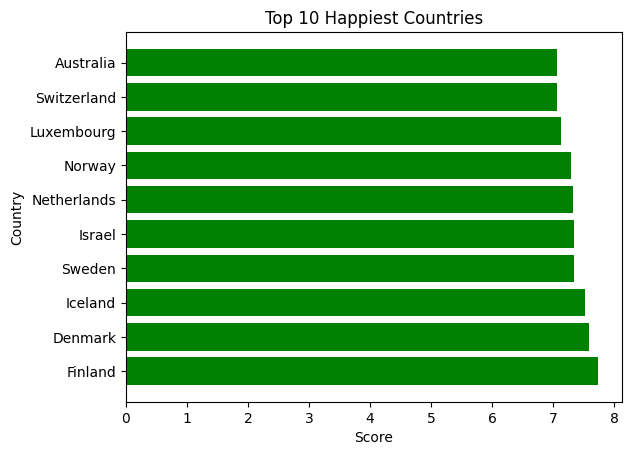

In [30]:
plt.barh(top_10_happiest['Country name'],top_10_happiest['score'],color='green')
plt.xlabel('Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries')

Text(0.5, 1.0, 'Top 10 Happiest Countries')

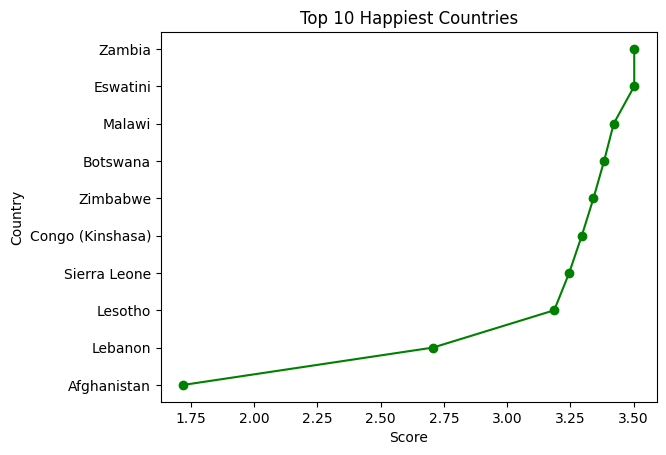

In [36]:

plt.plot(top_10_unhappiest['score'],top_10_unhappiest['Country name'],color='green',marker='o')
plt.xlabel('Score')
plt.ylabel('Country')
plt.title('Top 10 unhappiest Countries')

Text(0.5, 1.0, 'Distribution of Score')

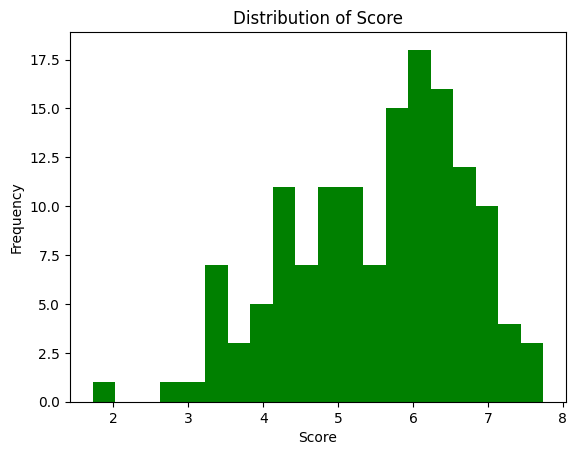

In [39]:
# • Plot a histogram for the Score column to show its distribution and also interpret.
plt.hist(df['score'],bins=20,color='green')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Score')

Text(0.5, 1.0, 'Relationship between GDP per Capita and Score')

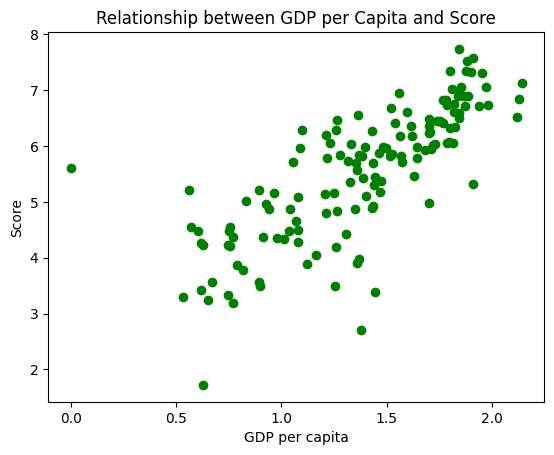

In [38]:
# • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.scatter(df['Log GDP per capita'],df['score'],color='green')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.title('Relationship between GDP per Capita and Score')

# 3.2 Problem - 2 - Some Advance Data Exploration Task:


# Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [43]:
# Steps:
# 1. Define the countries in South Asia with a list for example:
# south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]


In [44]:
# 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
filtered_data = df[df['Country name'].isin(south_asian_countries)]
filtered_data.head()


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low


In [45]:
# 3. Save the filtered dataframe as separate CSV files for future use.
filtered_data.to_csv('filtered_data.csv',index=False)


# Task - 2 - Composite Score Ranking:

In [49]:

# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
# following metrics:
# Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

df['Composite Score'] = 0.40 * df['Log GDP per capita'] + 0.30 * df['Social support'] + 0.30 * df['Healthy life expectancy']
df.tail()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness,Composite Score
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low,0.4917
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low,0.5073
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low,0.5637
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low,0.8907
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [50]:
# 2. Rank the South Asian countries based on the Composite Score in descending order.
sorted_df = df.sort_values(by = 'Composite Score',ascending = True)
sorted_df.head()


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness,Composite Score
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238
135,Malawi,3.421,0.617,0.410,0.349,0.571,0.135,0.136,1.203,Low,0.4745
115,Benin,4.377,0.914,0.128,0.284,0.567,0.112,0.252,2.121,Medium,0.4892
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low,0.4917
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low,0.5073


Text(0, 0.5, 'Country')

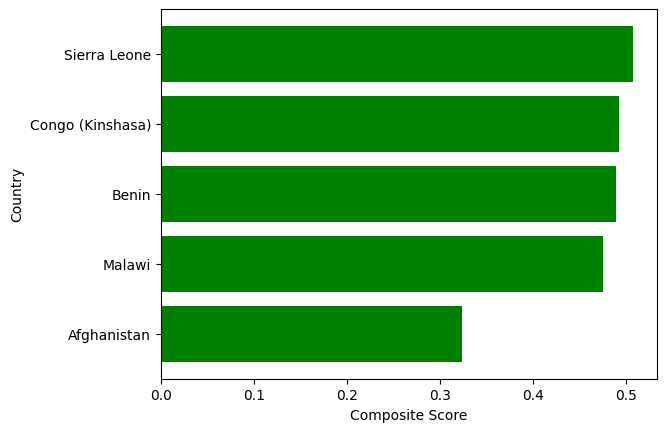

In [52]:
#3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
plt.barh(sorted_df['Country name'].head(),sorted_df['Composite Score'].head(),color='green')
plt.xlabel('Composite Score')
plt.ylabel('Country')

Text(0, 0.5, 'Composite Score')

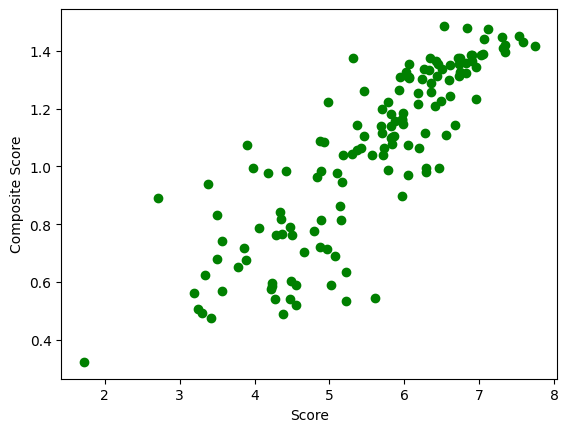

In [53]:
# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot
plt.scatter(df['score'],df['Composite Score'],color='green')
plt.xlabel('Score')
plt.ylabel('Composite Score')

# Task - 3 - Outlier Detection:

In [ ]:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.



In [ ]:
# 2. Define outliers using the 1.5 × IQR rule.


In [ ]:
# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.


In [ ]:
# 4. Discuss the characteristics of these outliers and their potential impact on regional averages.